<a href="https://colab.research.google.com/github/siddhsrivastava/IBM-PROJECT/blob/main/SentimentNaive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and be


Classification Report:

              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
    positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



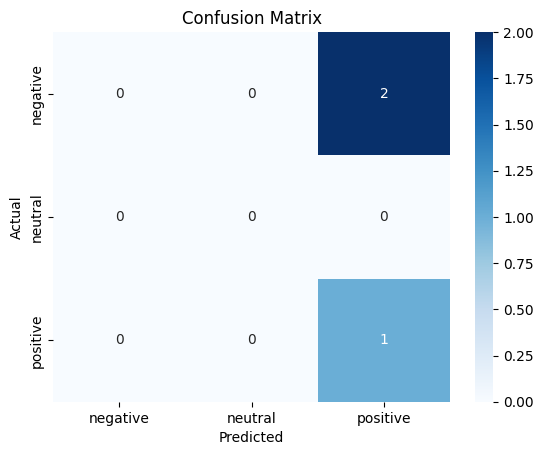


Sentiment Predictions:

Review: "Nothing extraordinary" ➜ Predicted Sentiment: neutral
Review: "Do not buy this product" ➜ Predicted Sentiment: negative
Review: "Top-notch and reliable" ➜ Predicted Sentiment: positive
Review: "Terrible support team" ➜ Predicted Sentiment: positive
Review: "I'm very happy with it" ➜ Predicted Sentiment: positive


In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')


data = {
    'Review': [
        "I love this product!",
        "Worst experience ever.",
        "Top-notch and reliable",
        "Do not buy this product",
        "Nothing extraordinary",
        "Terrible support team",
        "I'm very happy with it",
        "It was okay, nothing special",
        "Absolutely fantastic quality",
        "Complete waste of money"
    ],
    'Sentiment': [
        'positive', 'negative', 'positive', 'negative', 'neutral',
        'negative', 'positive', 'neutral', 'positive', 'negative'
    ]
}

df = pd.DataFrame(data)


stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t.isalpha() and t not in stop_words]
    stemmed = [stemmer.stem(t) for t in tokens]
    return ' '.join(stemmed)

df['Cleaned'] = df['Review'].apply(preprocess)


vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Cleaned'])
y = df['Sentiment']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


model = MultinomialNB()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=["negative", "neutral", "positive"])

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["negative", "neutral", "positive"], yticklabels=["negative", "neutral", "positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


sample_reviews = [
    "Nothing extraordinary",
    "Do not buy this product",
    "Top-notch and reliable",
    "Terrible support team",
    "I'm very happy with it"
]

sample_cleaned = [preprocess(review) for review in sample_reviews]
sample_tfidf = vectorizer.transform(sample_cleaned)
predictions = model.predict(sample_tfidf)

print("\nSentiment Predictions:\n")
for review, pred in zip(sample_reviews, predictions):
    print(f"Review: \"{review}\" ➜ Predicted Sentiment: {pred}")
